In [1]:
# Import
import pickle
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Input,
    LSTM, GRU, Bidirectional, Conv1D, Flatten,
    MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D,
    Reshape, Lambda
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [2]:
# Carregando os dados
df = pd.read_csv("kantesti_global_health_insights_2025_2026.csv")

In [3]:
# Shape
df.shape

(130, 49)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,country_code,country_name,region,sub_region,year,month,period,monthly_analyses,cumulative_analyses,unique_users,repeat_user_rate,avg_biomarkers_per_test,condition_healthy_pct,condition_cardiovascular_pct,condition_diabetes_pct,condition_metabolic_syndrome_pct,condition_anemia_pct,condition_thyroid_pct,condition_vitamin_d_deficiency_pct,condition_vitamin_b12_deficiency_pct,condition_liver_pct,condition_kidney_pct,condition_inflammation_pct,risk_optimal_pct,risk_normal_pct,risk_attention_pct,risk_elevated_pct,risk_critical_pct,age_18_29_pct,age_30_44_pct,age_45_59_pct,age_60_plus_pct,gender_male_pct,gender_female_pct,mobile_usage_pct,web_usage_pct,avg_report_pages,nutrition_plan_requested_pct,supplement_rec_requested_pct,primary_language,avg_health_score,avg_cardiovascular_risk_score,avg_metabolic_risk_score,avg_nutrient_score,top_abnormal_biomarker_1,top_abnormal_biomarker_2,top_abnormal_biomarker_3,avg_biomarkers_out_of_range,biomarker_abnormal_rate
0,BE,Belgium,Europe,Western Europe,2025,1,2025-01,7660,7660,6718,0.28,46.3,32.4,39.1,31.2,26.7,19.2,14.8,50.4,10.2,11.9,10.2,12.0,33.2,29.3,20.5,12.1,5.0,14.8,31.8,27.8,25.6,42.7,57.3,69.9,30.1,44.9,43.7,35.6,Dutch,69.6,29.2,27.1,58.7,LDL Cholesterol,Vitamin D,CRP,4.7,0.40
1,BE,Belgium,Europe,Western Europe,2025,2,2025-02,8833,16493,7404,0.19,46.6,34.3,41.0,28.1,28.3,17.4,16.7,48.4,9.3,12.9,10.3,13.6,33.9,30.1,20.4,13.6,2.0,14.5,31.2,26.2,28.1,42.0,58.0,65.9,34.1,44.3,43.4,42.2,Dutch,70.2,33.6,24.3,61.9,LDL Cholesterol,Vitamin D,CRP,3.7,0.40
2,BE,Belgium,Europe,Western Europe,2025,3,2025-03,9412,25905,7830,0.18,46.9,34.1,42.3,28.6,26.5,16.9,17.3,50.2,8.7,11.5,10.6,12.1,33.2,31.4,20.9,9.6,5.0,18.3,34.6,28.8,18.3,44.6,55.4,66.9,33.1,40.3,48.4,37.8,Dutch,72.2,28.0,20.3,59.5,LDL Cholesterol,Vitamin D,CRP,4.2,0.39
3,BE,Belgium,Europe,Western Europe,2025,4,2025-04,8657,34562,7311,0.29,45.2,34.8,40.0,32.3,28.7,18.9,17.3,38.6,8.3,14.0,11.3,13.0,33.5,28.8,21.6,11.1,5.0,18.9,35.2,26.0,19.9,43.1,56.9,66.2,33.8,42.6,47.2,41.3,Dutch,69.8,23.7,24.1,71.2,LDL Cholesterol,Vitamin D,CRP,4.0,0.40
4,BE,Belgium,Europe,Western Europe,2025,5,2025-05,10203,44765,8520,0.25,45.4,33.9,41.9,30.9,26.1,17.5,17.4,36.8,8.1,12.8,12.7,11.8,34.2,27.5,22.5,10.8,5.0,17.8,33.8,28.7,19.7,40.5,59.5,70.4,29.6,45.4,42.2,39.6,Dutch,70.6,24.6,20.5,66.3,LDL Cholesterol,Vitamin D,CRP,3.9,0.36


In [5]:
df.describe()

,year,month,monthly_analyses,cumulative_analyses,unique_users,repeat_user_rate,avg_biomarkers_per_test,condition_healthy_pct,condition_cardiovascular_pct,condition_diabetes_pct,condition_metabolic_syndrome_pct,condition_anemia_pct,condition_thyroid_pct,condition_vitamin_d_deficiency_pct,condition_vitamin_b12_deficiency_pct,condition_liver_pct,condition_kidney_pct,condition_inflammation_pct,risk_optimal_pct,risk_normal_pct,risk_attention_pct,risk_elevated_pct,risk_critical_pct,age_18_29_pct,age_30_44_pct,age_45_59_pct,age_60_plus_pct,gender_male_pct,gender_female_pct,mobile_usage_pct,web_usage_pct,avg_report_pages,nutrition_plan_requested_pct,supplement_rec_requested_pct,avg_health_score,avg_cardiovascular_risk_score,avg_metabolic_risk_score,avg_nutrient_score,avg_biomarkers_out_of_range,biomarker_abnormal_rate
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,2025.076923,6.076923,17576.053846,113561.192308,14924.623077,0.247000,46.037692,35.449231,39.561538,29.329231,24.656154,20.520769,16.196154,25.879231,8.923077,11.732308,10.830000,12.054615,32.809231,29.698462,21.566923,11.438462,4.492308,16.928462,33.013077,28.416154,21.643077,42.737692,57.262308,66.905385,33.094615,43.830000,46.641538,39.457692,72.105385,28.752308,26.165385,64.992308,4.198462,0.353000
std,0.267500,3.640034,5341.675338,76235.912862,4500.239748,0.041045,0.891673,2.701571,3.286627,4.027145,3.791606,4.763698,2.124840,13.838889,1.595125,1.292508,1.424734,1.303966,1.769003,1.516728,1.490507,1.364976,0.950040,1.699258,1.716513,1.495824,3.112090,1.701539,1.701539,2.819817,2.819817,2.210183,3.242255,2.550539,2.266381,3.923201,3.390518,3.880095,0.335493,0.029744
min,2025.000000,1.000000,7660.000000,7660.000000,6718.000000,0.180000,44.500000,29.400000,33.400000,20.600000,18.000000,12.400000,12.000000,12.800000,6.200000,9.100000,8.300000,9.500000,28.400000,26.300000,18.200000,9.000000,2.000000,14.000000,30.100000,26.000000,14.500000,40.100000,54.000000,62.100000,28.200000,40.100000,42.000000,35.000000,68.000000,22.100000,20.100000,58.400000,3.600000,0.300000
25%,2025.000000,3.000000,13704.000000,49448.750000,11528.500000,0.210000,45.225000,34.025000,37.225000,27.450000,22.125000,17.325000,14.525000,16.200000,7.900000,10.800000,10.000000,11.100000,31.425000,28.700000,20.425000,10.300000,4.300000,15.600000,31.625000,27.225000,19.500000,41.225000,55.825000,64.400000,30.800000,42.125000,43.425000,37.350000,70.200000,25.100000,23.325000,61.800000,3.900000,0.330000
50%,2025.000000,6.000000,17020.500000,100778.500000,14616.000000,0.250000,46.000000,35.200000,39.300000,29.100000,24.100000,19.600000,16.000000,18.400000,8.600000,11.700000,10.500000,12.000000,32.950000,29.750000,21.600000,11.300000,5.000000,16.750000,33.200000,28.400000,21.850000,42.650000,57.350000,66.900000,33.100000,43.850000,46.750000,39.950000,72.150000,28.400000,26.350000,65.100000,4.200000,0.360000
75%,2025.000000,9.000000,21977.000000,164023.000000,18523.250000,0.280000,46.800000,37.175000,41.575000,31.900000,26.900000,22.300000,17.500000,38.750000,9.575000,12.675000,11.500000,12.975000,34.050000,30.900000,22.700000,12.575000,5.000000,18.275000,34.300000,29.700000,23.650000,44.175000,58.775000,69.200000,35.600000,45.500000,49.775000,41.375000,73.875000,32.450000,28.875000,67.375000,4.500000,0.380000
max,2026.000000,12.000000,31440.000000,329217.000000,26122.000000,0.320000,47.500000,41.400000,47.500000,39.400000,34.200000,33.400000,20.900000,55.700000,13.800000,14.800000,15.300000,14.800000,37.100000,32.800000,24.500000,14.000000,5.000000,20.000000,36.000000,30.900000,28.300000,46.000000,59.900000,71.800000,3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country_code                          130 non-null    object 
 1   country_name                          130 non-null    object 
 2   region                                130 non-null    object 
 3   sub_region                            130 non-null    object 
 4   year                                  130 non-null    int64  
 5   month                                 130 non-null    int64  
 6   period                                130 non-null    object 
 7   monthly_analyses                      130 non-null    int64  
 8   cumulative_analyses                   130 non-null    int64  
 9   unique_users                          130 non-null    int64  
 10  repeat_user_rate                      130 non-null    float64
 11  avg_biomarkers_per_

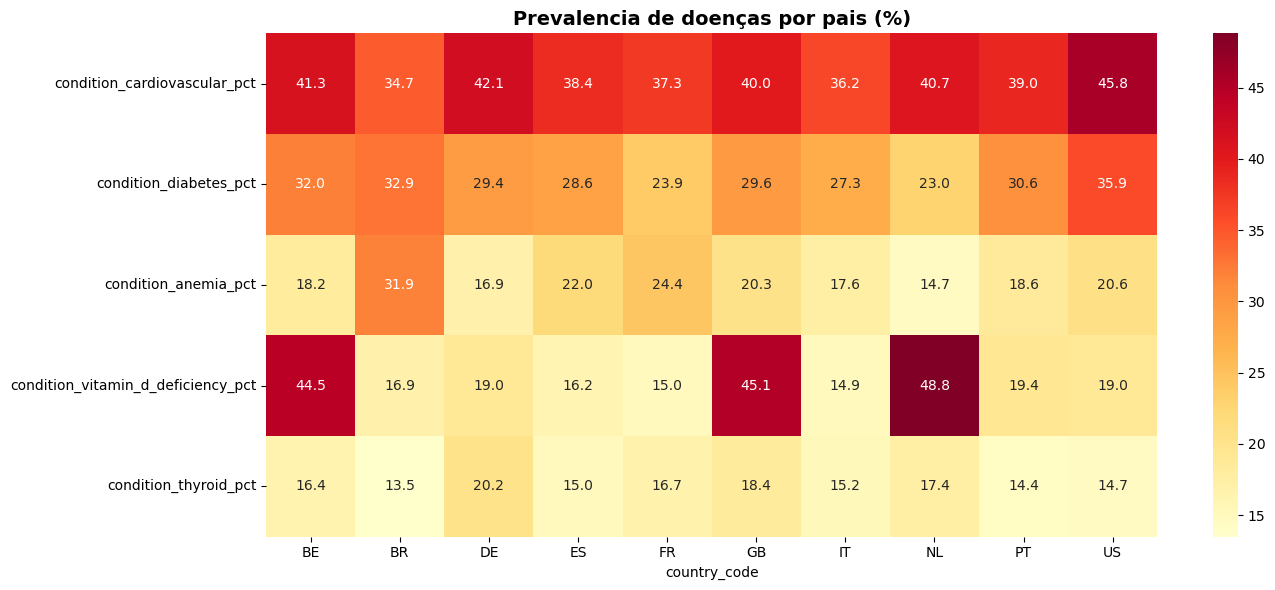

In [7]:
# Prevalencia de doença por pais
doenca_col = ['condition_cardiovascular_pct', 'condition_diabetes_pct', 'condition_anemia_pct',
                'condition_vitamin_d_deficiency_pct', 'condition_thyroid_pct']

disease_by_country = df.groupby('country_code')[doenca_col].mean().round(1)

# Heatmap
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(disease_by_country.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax)
ax.set_title('Prevalencia de doenças por pais (%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


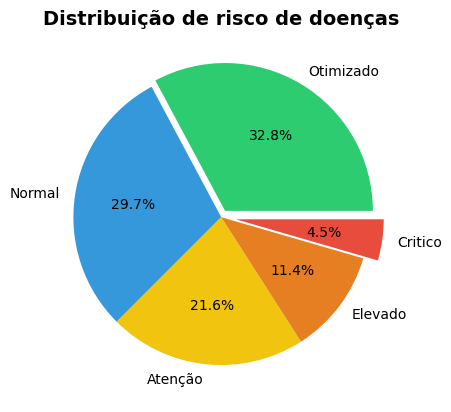

In [8]:
# Distribuição de risco
risco_col = ['risk_optimal_pct', 'risk_normal_pct', 'risk_attention_pct', 'risk_elevated_pct', 'risk_critical_pct']
risco_media = df[risco_col].mean()


# Pie chart
colors = ['#2ecc71', '#3498db', '#f1c40f', '#e67e22', '#e74c3c']
plt.pie(risco_media, labels=['Otimizado', 'Normal', 'Atenção', 'Elevado', 'Critico'],
            autopct='%1.1f%%', colors=colors, explode=[0.05, 0, 0, 0, 0.1])

plt.title('Distribuição de risco de doenças', fontsize=14, fontweight='bold')



plt.show()

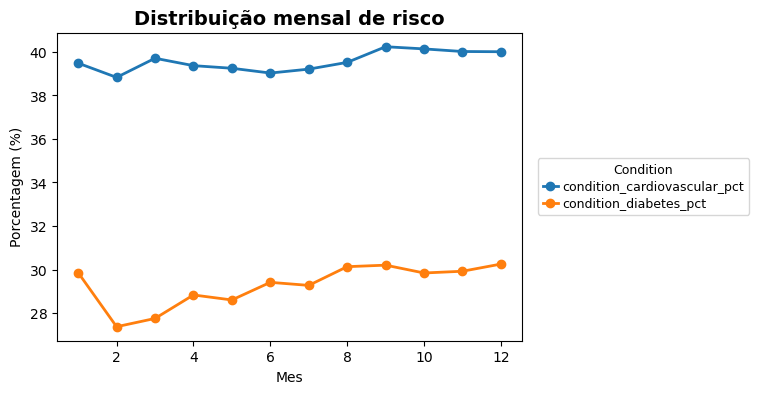

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))

monthly = df.groupby('month')[[
    'condition_cardiovascular_pct',
    'condition_diabetes_pct'
]].mean()

monthly.plot(ax=ax, marker='o', linewidth=2)

ax.set_title('Distribuição mensal de risco', fontsize=14, fontweight='bold')
ax.set_xlabel('Mes')
ax.set_ylabel('Porcentagem (%)')
ax.legend(title='Condition',loc='center left',bbox_to_anchor=(1.02, 0.5),
    fontsize=9, title_fontsize=9, frameon=True, borderpad=0.4, labelspacing=0.3, handlelength=1.2, handletextpad=0.4)


plt.show()

In [10]:
df2 = df.copy()

In [11]:
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

df2['country_code'] = df2['country_code'].apply(iso2_to_iso3)

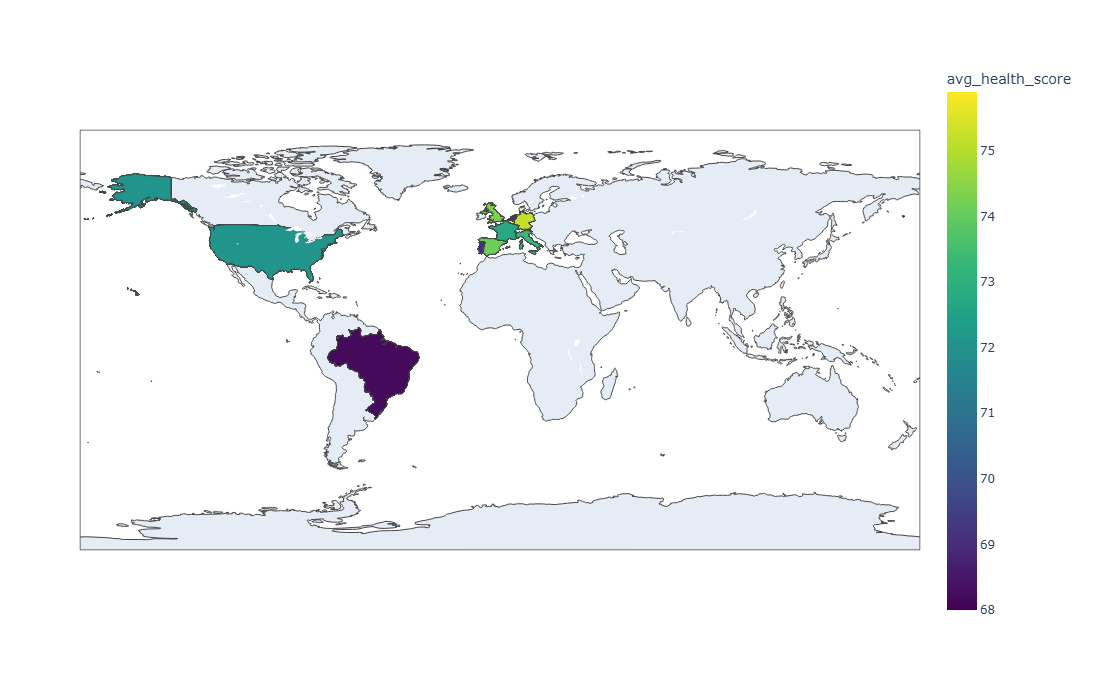

In [12]:
fig = px.choropleth(
    df2,
    locations='country_code',
    color='avg_health_score',
    locationmode='ISO-3',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    width=1000,
    height=700
)

fig.show()

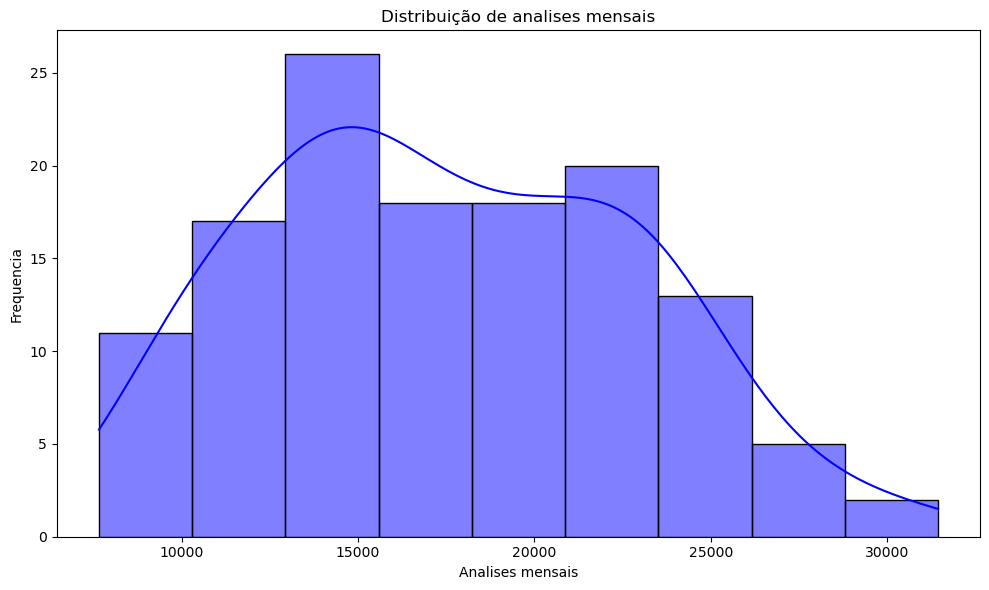

In [13]:
## Histogram of Monthly Analyses
plt.figure(figsize=(10, 6))
sns.histplot(df['monthly_analyses'], kde=True, color='blue')
plt.title('Distribuição de analises mensais')
plt.xlabel('Analises mensais')
plt.ylabel('Frequencia')
plt.tight_layout()
plt.show()

In [14]:
df_ml = df.copy()

# features temporais
df_ml['month_sin'] = np.sin(2 * np.pi * df_ml['month'] / 12)
df_ml['month_cos'] = np.cos(2 * np.pi * df_ml['month'] / 12)
df_ml['is_winter'] = df_ml['month'].isin([12, 1, 2, 3]).astype(int)

# features geograficas
latitude_map = {'US': 38, 'DE': 51, 'FR': 46, 'GB': 54, 'BR': -14, 'IT': 42, 'ES': 40, 'NL': 52, 'PT': 39, 'BE': 51}
df_ml['latitude'] = df_ml['country_code'].map(latitude_map)
df_ml['is_northern'] = (df_ml['latitude'] > 45).astype(int)

# metricas agregadas
df_ml['total_chronic'] = (df_ml['condition_cardiovascular_pct'] + df_ml['condition_diabetes_pct'] + df_ml['condition_metabolic_syndrome_pct']) / 3
df_ml['high_risk_pct'] = df_ml['risk_elevated_pct'] + df_ml['risk_critical_pct']
df_ml['engagement'] = (df_ml['nutrition_plan_requested_pct'] + df_ml['supplement_rec_requested_pct']) / 2

# Classificação target
risco_col = ['risk_optimal_pct', 'risk_normal_pct', 'risk_attention_pct', 'risk_elevated_pct', 'risk_critical_pct']
df_ml['dominant_risk'] = df_ml[risco_col].idxmax(axis=1).str.replace('risk_', '').str.replace('_pct', '')
df_ml['risk_encoded'] = LabelEncoder().fit_transform(df_ml['dominant_risk'])

In [15]:
# Feature columns
feature_cols = [
    'monthly_analyses', 'unique_users', 'repeat_user_rate',
    'condition_cardiovascular_pct', 'condition_diabetes_pct', 'condition_metabolic_syndrome_pct',
    'condition_anemia_pct', 'condition_thyroid_pct', 'condition_vitamin_d_deficiency_pct',
    'condition_liver_pct', 'condition_kidney_pct', 'condition_inflammation_pct',
    'age_18_29_pct', 'age_30_44_pct', 'age_45_59_pct', 'age_60_plus_pct',
    'gender_male_pct', 'mobile_usage_pct',
    'month_sin', 'month_cos', 'latitude', 'is_northern', 'is_winter',
    'total_chronic', 'high_risk_pct', 'engagement'
]

X = df_ml[feature_cols].values
y = df_ml['avg_health_score'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
print("="*70)
print("Modelos tradicionais de machine learning")
print("="*70)

modelos = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(n_estimators=100, max_depth=5, random_state=42, verbose=-1),
    'CatBoost': CatBoostRegressor(n_estimators=100, max_depth=5, random_state=42, verbose=0),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = []

for name, model in modelos.items():
    if name in ['Linear Regression', 'Ridge', 'SVR', 'KNN']:
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    
    results.append({'Model': name, 'RMSE': rmse, 'R²': r2})
    print(f"✅ {name:20s} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

resultados_df = pd.DataFrame(results).sort_values('R²', ascending=False)
print("\n RANKING:")
resultados_df

Modelos tradicionais de machine learning
✅ Linear Regression    | RMSE: 3.0869 | R²: -0.8551
✅ Ridge                | RMSE: 3.0551 | R²: -0.8171
✅ Random Forest        | RMSE: 2.4056 | R²: -0.1267
✅ Gradient Boosting    | RMSE: 2.2094 | R²: 0.0496
✅ XGBoost              | RMSE: 2.4604 | R²: -0.1786
✅ LightGBM             | RMSE: 2.8310 | R²: -0.5603
✅ CatBoost             | RMSE: 2.4273 | R²: -0.1470
✅ Extra Trees          | RMSE: 2.4193 | R²: -0.1396
✅ SVR                  | RMSE: 2.4714 | R²: -0.1891
✅ KNN                  | RMSE: 2.7286 | R²: -0.4495

 RANKING:


,Model,RMSE,R²
3,Gradient Boosting,2.209413,0.049613
2,Random Forest,2.405611,-0.126673
7,Extra Trees,2.419336,-0.139566
6,CatBoost,2.427255,-0.147038
4,XGBoost,2.460394,-0.178573
8,SVR,2.471402,-0.189142
9,KNN,2.728556,-0.449481
5,LightGBM,2.830960,-0.560323
1,Ridge,3.055066,-0.817139
0,Linear Regression,3.086850,-0.855146


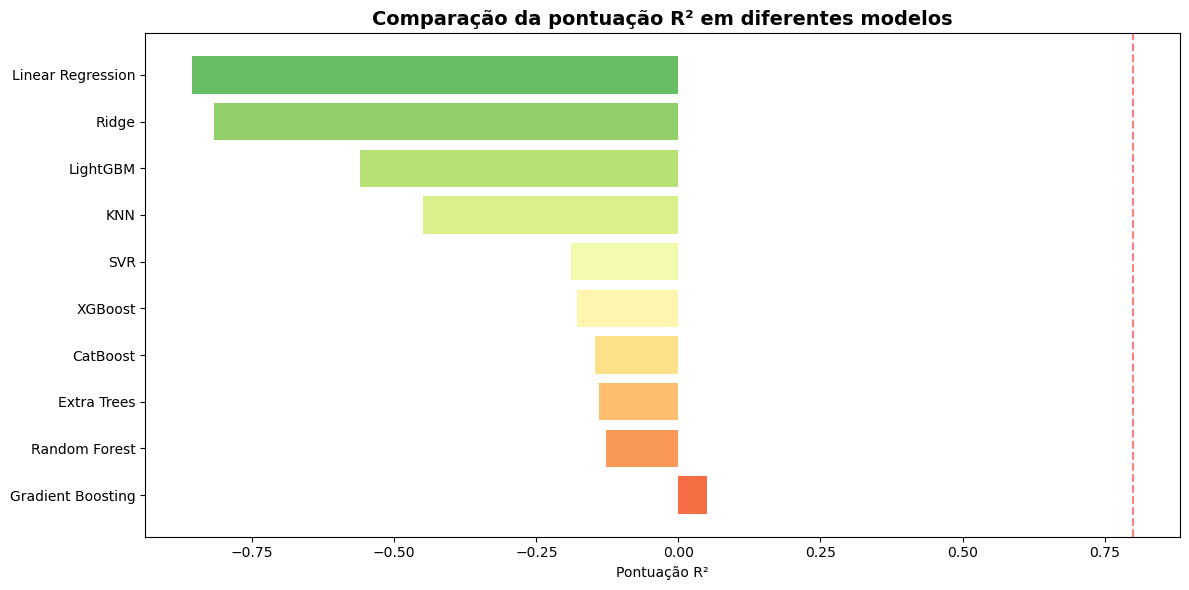

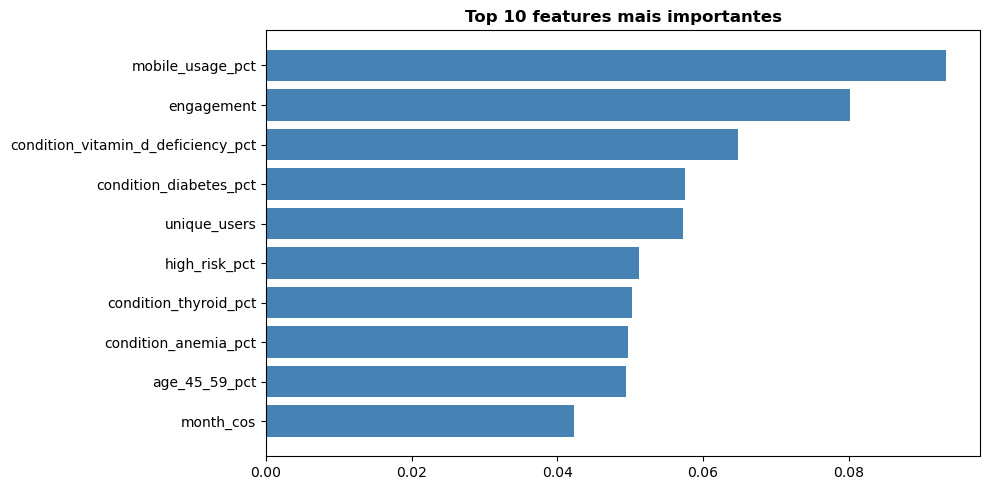

In [17]:
# Visualize results
fig, ax = plt.subplots(figsize=(12, 6))
cores = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(resultados_df)))
ax.barh(resultados_df['Model'], resultados_df['R²'], color=cores)
ax.set_xlabel('Pontuação R²')
ax.set_title('Comparação da pontuação R² em diferentes modelos', fontsize=14, fontweight='bold')
ax.axvline(x=0.8, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importance = pd.DataFrame({'Feature': feature_cols, 'Importance': rf.feature_importances_})
importance = importance.sort_values('Importance', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(importance['Feature'], importance['Importance'], color='steelblue')
ax.set_title('Top 10 features mais importantes', fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [18]:
print("="*70)
print("Modelos de redes neurais")
print("="*70)

# Preparação dos dados
X_nn = X_train_scaled
X_nn_test = X_test_scaled
y_nn = y_train
y_nn_test = y_test

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

nn_results = []

Modelos de redes neurais


In [19]:
# MLP Model
mlp = Sequential([
    Input(shape=(X_nn.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
mlp.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

hist_mlp = mlp.fit(X_nn, y_nn, validation_split=0.2, epochs=100, batch_size=16,
                       callbacks=[early_stop, reduce_lr], verbose=0)

mlp_pred = mlp.predict(X_nn_test, verbose=0).flatten()
mlp_rmse = np.sqrt(mean_squared_error(y_nn_test, mlp_pred))
mlp_r2 = r2_score(y_nn_test, mlp_pred)
nn_results.append({'Model': 'MLP', 'RMSE': mlp_rmse, 'R²': mlp_r2})
print(f"   MLP: RMSE={mlp_rmse:.4f}, R²={mlp_r2:.4f}")




   MLP: RMSE=15.4287, R²=-45.3453


In [20]:
# LSTM Model
X_seq = X_nn.reshape(X_nn.shape[0], X_nn.shape[1], 1)
X_seq_test = X_nn_test.reshape(X_nn_test.shape[0], X_nn_test.shape[1], 1)

lstm = Sequential([
    Input(shape=(X_seq.shape[1], 1)),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

hist_lstm = lstm.fit(X_seq, y_nn, validation_split=0.2, epochs=100, batch_size=16,
                         callbacks=[early_stop, reduce_lr], verbose=0)

lstm_pred = lstm.predict(X_seq_test, verbose=0).flatten()
lstm_rmse = np.sqrt(mean_squared_error(y_nn_test, lstm_pred))
lstm_r2 = r2_score(y_nn_test, lstm_pred)
nn_results.append({'Model': 'LSTM', 'RMSE': lstm_rmse, 'R²': lstm_r2})
print(f"   ✅ LSTM: RMSE={lstm_rmse:.4f}, R²={lstm_r2:.4f}")

   ✅ LSTM: RMSE=2.2700, R²=-0.0032


In [21]:
# GRU Model
gru = Sequential([
    Input(shape=(X_seq.shape[1], 1)),
    GRU(64, return_sequences=True),
    Dropout(0.3),
    GRU(32),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
gru.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

hist_gru = gru.fit(X_seq, y_nn, validation_split=0.2, epochs=100, batch_size=16,
                       callbacks=[early_stop, reduce_lr], verbose=0)

gru_pred = gru.predict(X_seq_test, verbose=0).flatten()
gru_rmse = np.sqrt(mean_squared_error(y_nn_test, gru_pred))
gru_r2 = r2_score(y_nn_test, gru_pred)
nn_results.append({'Model': 'GRU', 'RMSE': gru_rmse, 'R²': gru_r2})
print(f"   GRU: RMSE={gru_rmse:.4f}, R²={gru_r2:.4f}")

   GRU: RMSE=2.2707, R²=-0.0038


In [22]:
# Bloco transformer customizado
class TransformerBlock(keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super().__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([Dense(ff_dim, activation='relu'), Dense(embed_dim)])
        self.ln1 = LayerNormalization(epsilon=1e-6)
        self.ln2 = LayerNormalization(epsilon=1e-6)
        self.drop1 = Dropout(dropout)
        self.drop2 = Dropout(dropout)
    
    def call(self, inputs, training=False):
        attn = self.att(inputs, inputs)
        attn = self.drop1(attn, training=training)
        out1 = self.ln1(inputs + attn)
        ffn = self.ffn(out1)
        ffn = self.drop2(ffn, training=training)
        return self.ln2(out1 + ffn)

In [23]:
# Construindo modelo transformers
def build_transformer(input_dim, num_heads=4, ff_dim=64, num_blocks=2):
    inputs = Input(shape=(input_dim,))
    
    # Embedding
    x = Dense(64, activation='relu')(inputs)
    x = BatchNormalization()(x)
    
    # Reshape usando camada keras
    x = Reshape((1, 64))(x)
    
    # Blocos transformers
    for _ in range(num_blocks):
        x = TransformerBlock(64, num_heads, ff_dim, 0.1)(x)
    
    # Output
    x = GlobalAveragePooling1D()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
    return model

transformer = build_transformer(X_nn.shape[1])
transformer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense_8 (Dense)             (None, 64)                1728      
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 reshape (Reshape)           (None, 1, 64)             0         
                                                                 
 transformer_block (Transfo  (None, 1, 64)             74944     
 rmerBlock)                                                      
                                                                 
 transformer_block_1 (Trans  (None, 1, 64)             74944 

In [24]:
print("\nTreinando modelo transformer")

hist_trans = transformer.fit(
    X_nn, y_nn,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

trans_pred = transformer.predict(X_nn_test, verbose=0).flatten()
trans_rmse = np.sqrt(mean_squared_error(y_nn_test, trans_pred))
trans_r2 = r2_score(y_nn_test, trans_pred)
nn_results.append({'Model': 'Transformer', 'RMSE': trans_rmse, 'R²': trans_r2})
print(f"\nTransformer: RMSE={trans_rmse:.4f}, R²={trans_r2:.4f}")


Treinando modelo transformer
Epoch 1/100
6/6 [==============================] - 5s 95ms/step - loss: 5002.9189 - mae: 70.6858 - val_loss: 4705.3306 - val_mae: 68.5771 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 4672.5864 - mae: 68.3095 - val_loss: 4398.8662 - val_mae: 66.3036 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 4414.9771 - mae: 66.3827 - val_loss: 4120.9360 - val_mae: 64.1719 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 4113.9419 - mae: 64.0761 - val_loss: 3856.4836 - val_mae: 62.0774 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 3911.9519 - mae: 62.4620 - val_loss: 3624.8572 - val_mae: 60.1831 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 3631.9438 - mae: 60.1781 - val_loss: 3389.1575 - val_mae: 58.1919 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss

In [25]:
# Neural Network Results
print("\n" + "="*50)
print("Ranking")
print("="*50)
nn_df = pd.DataFrame(nn_results).sort_values('R²', ascending=False)
nn_df


Ranking


,Model,RMSE,R²
3,Transformer,2.265541,0.000711
1,LSTM,2.270016,-0.003240
2,GRU,2.270671,-0.003819
0,MLP,15.428702,-45.345307


In [26]:
print("="*70)
print("Comparação compreensiva de modelos")
print("="*70)

# Combinação dos resultados
all_results = []
for _, row in resultados_df.iterrows():
    all_results.append({'Model': row['Model'], 'Type': 'Modelo tradicional', 'RMSE': row['RMSE'], 'R²': row['R²']})
for res in nn_results:
    all_results.append({'Model': res['Model'], 'Type': 'Deep Learning', 'RMSE': res['RMSE'], 'R²': res['R²']})

all_df = pd.DataFrame(all_results).sort_values('R²', ascending=False)

# Melhor modelo
melhor = all_df.iloc[0]
print(f"\nMelhor modelo: {melhor['Model']}")
print(f"   Tipo: {melhor['Type']}")
print(f"   R²: {melhor['R²']:.4f}")
print(f"   RMSE: {melhor['RMSE']:.4f}")

all_df

Comparação compreensiva de modelos

Melhor modelo: Gradient Boosting
   Tipo: Modelo tradicional
   R²: 0.0496
   RMSE: 2.2094


,Model,Type,RMSE,R²
0,Gradient Boosting,Modelo tradicional,2.209413,0.049613
13,Transformer,Deep Learning,2.265541,0.000711
11,LSTM,Deep Learning,2.270016,-0.003240
12,GRU,Deep Learning,2.270671,-0.003819
1,Random Forest,Modelo tradicional,2.405611,-0.126673
2,Extra Trees,Modelo tradicional,2.419336,-0.139566
3,CatBoost,Modelo tradicional,2.427255,-0.147038
4,XGBoost,Modelo tradicional,2.460394,-0.178573
5,SVR,Modelo tradicional,2.471402,-0.189142
6,KNN,Modelo tradicional,2.728556,-0.449481


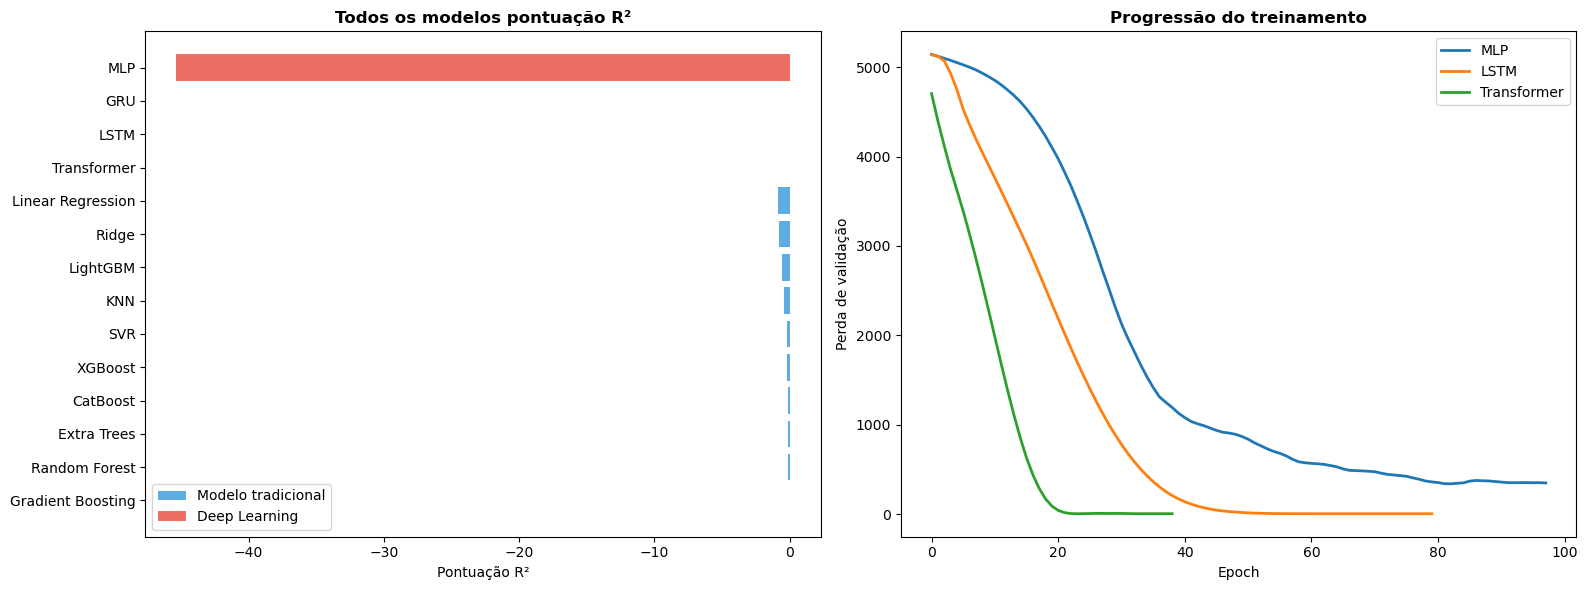

In [27]:
# Visualização final
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cores = {'Modelo tradicional': '#3498db', 'Deep Learning': '#e74c3c'}

# Comparação R²
for t in all_df['Type'].unique():
    subset = all_df[all_df['Type'] == t]
    axes[0].barh(subset['Model'], subset['R²'], color=cores[t], label=t, alpha=0.8)
axes[0].set_xlabel('Pontuação R²')
axes[0].set_title('Todos os modelos pontuação R²', fontweight='bold')
axes[0].legend()

# Curvas de treinamento
axes[1].plot(hist_mlp.history['val_loss'], label='MLP', linewidth=2)
axes[1].plot(hist_lstm.history['val_loss'], label='LSTM', linewidth=2)
axes[1].plot(hist_trans.history['val_loss'], label='Transformer', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Perda de validação')
axes[1].set_title('Progressão do treinamento', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('comparação_modelo.png', dpi=150)
plt.show()